In [1]:
import pandas as pd
import seaborn as sns #regplot, kdeplot, histplot
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split # train & test
from sklearn.linear_model import LinearRegression # train Linear Regression model
from sklearn.preprocessing import PolynomialFeatures # create Polynomial features
from sklearn.metrics import mean_squared_error, mean_absolute_error # metric


from scipy.stats.stats import pearsonr

import statsmodels.api as sm # get summary of result

In [2]:
df=pd.read_csv("children_lung.txt",sep=" ")

In [3]:
df.head()

,Unnamed: 0,Unnamed: 1,age,FEV,ht,Unnamed: 5,Unnamed: 6,sex,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,smoke,Unnamed: 13,Unnamed: 14
0,NaN,NaN,9.0,1.708,57.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN
1,NaN,NaN,8.0,1.724,67.5,NaN,NaN,0.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN
2,NaN,NaN,7.0,1.720,54.5,NaN,NaN,0.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN
3,NaN,NaN,9.0,1.558,53.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN
4,NaN,NaN,9.0,1.895,57.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN


In [4]:
df= df[['age','FEV','ht','sex','smoke']]

<AxesSubplot:xlabel='age', ylabel='FEV'>

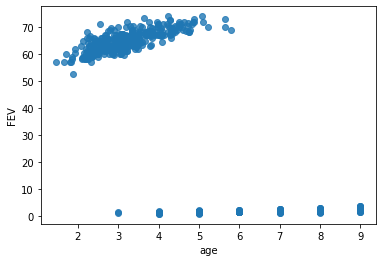

In [5]:
sns.regplot(data=df, x= 'age',y='FEV', fit_reg=False)

<AxesSubplot:xlabel='FEV', ylabel='Count'>

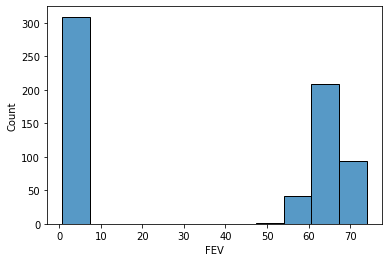

In [6]:
sns.histplot(df.FEV)

In [7]:
df_fevlower= df[df.FEV<10]
df_fevupper= df[df.FEV>=10]

<AxesSubplot:xlabel='age', ylabel='FEV'>

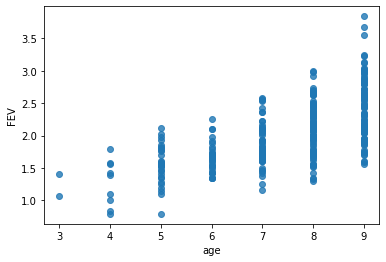

In [8]:
sns.regplot(data=df_fevlower, x= 'age',y='FEV', fit_reg=False)

# Simple Linear Regression 

In [9]:
df_fevupper.head()

,age,FEV,ht,sex,smoke
309,2.884,69.0,NaN,NaN,NaN
310,2.328,64.0,NaN,NaN,NaN
311,3.381,63.0,NaN,NaN,NaN
312,2.170,58.0,NaN,NaN,NaN
313,3.470,66.5,NaN,NaN,NaN


In [10]:
df_fevupper.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 345 entries, 309 to 653
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   age     345 non-null    float64
 1   FEV     345 non-null    float64
 2   ht      0 non-null      float64
 3   sex     0 non-null      float64
 4   smoke   0 non-null      float64
dtypes: float64(5)
memory usage: 16.2 KB


**1.choose features**

In [11]:
#1 choose features
x_u= df_fevupper[['age']]
y_u= df_fevupper['FEV']

**2.split data**

In [12]:
#2 split data
x_u_train, x_u_test, y_u_train, y_u_test= train_test_split(x_u,y_u,train_size=0.8, random_state=123)

**3.train model**

In [13]:
#3 train model
lm=LinearRegression()
lm.fit(x_u_train,y_u_train)

LinearRegression()

In [14]:
lm.coef_

array([3.79635619])

In [15]:
lm.intercept_

52.8380373019821

In [16]:
lm.n_features_in_

1

**4.Evaluate on train data**

In [17]:
#4 evaluate on train data
y_train_prediction= lm.predict(x_u_train)
y_train_prediction.shape

(276,)

In [18]:
# Rsquare
lm.score(x_u_train, y_u_train)

0.5718713701588741

In [19]:
# MSE
mean_squared_error(y_u_train,y_train_prediction)

5.99669159650868

In [20]:
# summary of result
x1_u_train= sm.add_constant(x_u_train)
model=sm.OLS(y_u_train, x1_u_train).fit()
model.summary()

C:\Users\tangh\AppData\Roaming\Python\Python38\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    FEV   R-squared:                       0.572
Model:                            OLS   Adj. R-squared:                  0.570
Method:                 Least Squares   F-statistic:                     366.0
Date:                Sat, 01 Jan 2022   Prob (F-statistic):           2.13e-52
Time:                        18:18:54   Log-Likelihood:                -638.81
No. Observations:                 276   AIC:                             1282.
Df Residuals:                     274   BIC:                             1289.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         52.8380      0.645     81.973      0.000      51.569      54.107
age            3.7964      0.198     19.131      0.000       3.406       4.187
==============================================================================
Omnibus:                        8.530   Durbin-Watson:                   2.241
Prob(Omnibus):                  0.014   Jarque-Bera (JB):                8.506
Skew:                           0.379   Prob(JB):                       0.0142
Kurtosis:                       3.406   Cond. No.                         15.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**5.Visualize**

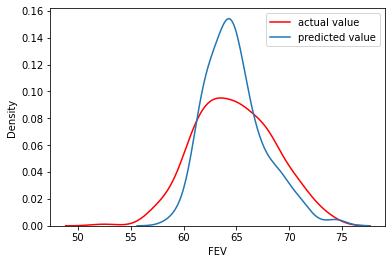

In [21]:
sns.kdeplot(x=y_u_train,label= "actual value",color='r')
sns.kdeplot(x=y_train_prediction,label= "predicted value")
plt.legend()

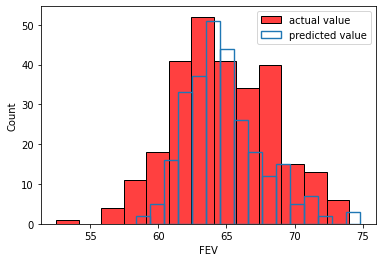

In [22]:
sns.histplot(x=y_u_train,label= "actual value",color='r',fill=True)
sns.histplot(x=y_train_prediction,label= "predicted value",fill=False)
plt.legend()

# Multiple Linear Regression

In [23]:
df_fevlower.head()

,age,FEV,ht,sex,smoke
0,9.0,1.708,57.0,0.0,0.0
1,8.0,1.724,67.5,0.0,0.0
2,7.0,1.720,54.5,0.0,0.0
3,9.0,1.558,53.0,1.0,0.0
4,9.0,1.895,57.0,1.0,0.0


In [24]:
#1 choose features

In [25]:
xl= df_fevlower[['age','ht','sex']]
yl=df_fevlower['FEV']

In [26]:
#2 split data
xl_train,xl_test,yl_train,yl_test= train_test_split(xl,yl,train_size= 0.8,random_state= 123)

In [27]:
#3 train model
lm1= LinearRegression()

In [29]:
lm1.fit(xl_train,yl_train)

LinearRegression()

In [30]:
lm1.n_features_in_

3

In [31]:
lm1.intercept_

-3.386930569158902

In [32]:
lm1.coef_

array([0.0071615 , 0.09338109, 0.0955592 ])

In [33]:
#4 evaluate model on train data
#rsquared
lm1.score(xl_train,yl_train)

0.669259486930049

In [34]:
mean_squared_error(yl_train,lm1.predict(xl_train))

0.08701766471623566

In [35]:
#5 evaluate model on test data
#rsquared
lm1.score(xl_test,yl_test)

0.7263007576807959

In [36]:
mean_squared_error(yl_test,lm1.predict(xl_test))

0.06893297444893698

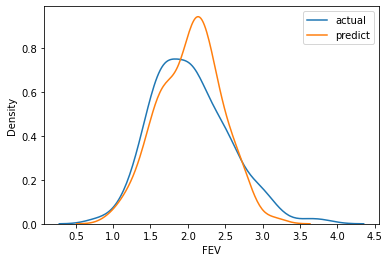

In [37]:
# visualize
sns.kdeplot(x= yl_train,label="actual")
sns.kdeplot(x=lm1.predict(xl_train),label="predict" )
plt.legend()

# Polynominal Regression

In [38]:
df_fevupper.head()

,age,FEV,ht,sex,smoke
309,2.884,69.0,NaN,NaN,NaN
310,2.328,64.0,NaN,NaN,NaN
311,3.381,63.0,NaN,NaN,NaN
312,2.170,58.0,NaN,NaN,NaN
313,3.470,66.5,NaN,NaN,NaN


**1.Choose features & create new features**

In [39]:
x_u_p= df_fevupper[['age']]
y_u_p= df_fevupper['FEV']

In [40]:
pr=PolynomialFeatures(degree=2)
pr

PolynomialFeatures()

In [41]:
pr.fit(x_u_p)

PolynomialFeatures()

In [42]:
x_u_p_new= pr.transform(x_u_p)

In [43]:
x_u_p_new[0] 
# create 1 more variable of x^2

array([1.      , 2.884   , 8.317456])

In [44]:
x_u_p.shape, x_u_p_new.shape

((345, 1), (345, 3))

**2.split data**

In [45]:
x_train, x_test, y_train, y_test= train_test_split(x_u_p_new,y_u_p,train_size=0.8, random_state=123)

**3.train model**

In [47]:
lm=LinearRegression()
lm.fit(x_train,y_train)

LinearRegression()

In [48]:
lm.intercept_

47.17089171581952

In [49]:
lm.coef_
#y=  47.17+ 7.26x -0.50x^2

array([ 0.        ,  7.2662062 , -0.50259266])

**4.Evaluate model on train data using Rsquare & MSE**

In [50]:
y_train_prediction= lm.predict(x_train)
y_train_prediction.shape

(276,)

In [51]:
#Rsqure
lm.score(x_train, y_train)

0.5834474604165538

In [52]:
#Rquare from another library
from sklearn.metrics import r2_score
r2_score(y_train,lm.predict(x_train))

0.5834474604165538

In [53]:
# MSE
mean_squared_error(y_train,lm.predict(x_train))

5.834548169673586

**5.Visualization**

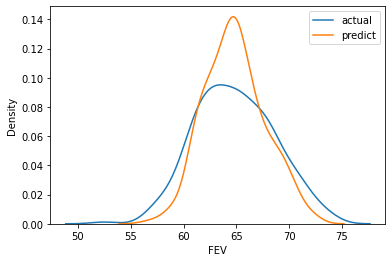

In [54]:
sns.kdeplot(x= y_train,label="actual")
sns.kdeplot(x=lm.predict(x_train),label="predict" )
plt.legend()